<a href="https://colab.research.google.com/github/SDGP-SE27/Save-Hearts/blob/main/Blood_Forecasting_System_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
from google.colab import data_table
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/content/gdrive/MyDrive/SDGP /DataSets/CSV File/Blood Usage Data.csv'
df = pd.read_csv(path)


In [ ]:
df.head()

,Month,Blood usage
0,1/1/2019,37922
1,1/2/2019,40335
2,1/3/2019,37043
3,1/4/2019,32587
4,1/5/2019,35864


In [ ]:
df.describe

<bound method NDFrame.describe of         Month  Blood usage
0    1/1/2019        37922
1    1/2/2019        40335
2    1/3/2019        37043
3    1/4/2019        32587
4    1/5/2019        35864
5    1/6/2019        38975
6    1/7/2019        37868
7    1/8/2019        38425
8    1/9/2019        33901
9   1/10/2019        35513
10  1/11/2019        34894
11  1/12/2019        41188
12   1/1/2020        38122
13   1/2/2020        38987
14   1/3/2020        29335
15   1/4/2020        17550
16   1/5/2020        33403
17   1/6/2020        40557
18   1/7/2020        30730
19   1/8/2020        38512
20   1/9/2020        37989
21  1/10/2020        27203
22  1/11/2020        32536
23  1/12/2020        32909
24   1/1/2021        29083
25   1/2/2021        30200
26   1/3/2021        35865
27   1/4/2021        31035
28   1/5/2021        35692
29   1/6/2021        26291
30   1/7/2021        29143
31   1/8/2021        30803
32   1/9/2021        37380
33  1/10/2021        31810
34  1/11/2021        

In [ ]:
df.tail()

,Month,Blood usage
31,1/8/2021,30803
32,1/9/2021,37380
33,1/10/2021,31810
34,1/11/2021,33670
35,1/12/2021,34082


In [ ]:
#Convert Month into Datatime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Blood usage
0,2019-01-01,37922
1,2019-01-02,40335
2,2019-01-03,37043
3,2019-01-04,32587
4,2019-01-05,35864


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Blood usage
Month,
2019-01-01,37922
2019-01-02,40335
2019-01-03,37043
2019-01-04,32587
2019-01-05,35864


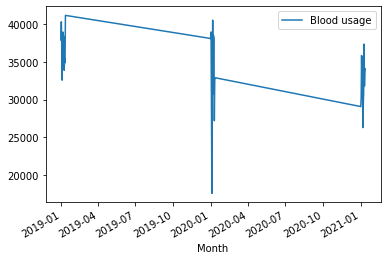

In [ ]:
df.plot()

In [ ]:
### Testing for Stationarity 

from statsmodels.tsa.stattools import adfuller


In [ ]:
test_result = adfuller(df['Blood usage'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Blood usage'])

ADF Test Statistic : -4.555963148390696
p-value : 0.00015558912181247428
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


**Differencing**

In [ ]:
#df['Blood Usage First Difference'] =  df['Blood usage'] - df['Blood usage'].shift(1)

In [ ]:
#df['Blood usage'].shift(1)

Month
2019-01-01        NaN
2019-01-02    37922.0
2019-01-03    40335.0
2019-01-04    37043.0
2019-01-05    32587.0
2019-01-06    35864.0
2019-01-07    38975.0
2019-01-08    37868.0
2019-01-09    38425.0
2019-01-10    33901.0
2019-01-11    35513.0
2019-01-12    34894.0
2020-01-01    41188.0
2020-01-02    38122.0
2020-01-03    38987.0
2020-01-04    29335.0
2020-01-05    17550.0
2020-01-06    33403.0
2020-01-07    40557.0
2020-01-08    30730.0
2020-01-09    38512.0
2020-01-10    37989.0
2020-01-11    27203.0
2020-01-12    32536.0
2021-01-01    32909.0
2021-01-02    29083.0
2021-01-03    30200.0
2021-01-04    35865.0
2021-01-05    31035.0
2021-01-06    35692.0
2021-01-07    26291.0
2021-01-08    29143.0
2021-01-09    30803.0
2021-01-10    37380.0
2021-01-11    31810.0
2021-01-12    33670.0
Name: Blood usage, dtype: float64

In [ ]:
#df['Seasonal First Difference']=df['Blood usage']-df['Blood usage'].shift(12)

In [ ]:
#df.head(14)

,Blood usage,Blood Usage First Difference,Seasonal First Difference
Month,,,
2019-01-01,37922,NaN,NaN
2019-01-02,40335,2413.0,NaN
2019-01-03,37043,-3292.0,NaN
2019-01-04,32587,-4456.0,NaN
2019-01-05,35864,3277.0,NaN
2019-01-06,38975,3111.0,NaN
2019-01-07,37868,-1107.0,NaN
2019-01-08,38425,557.0,NaN
2019-01-09,33901,-4524.0,NaN


In [ ]:
##Again test dicky fuller test
#adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 1.2900306696739465
p-value : 0.996552529497539
#Lags Used : 9
Number of Observations Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


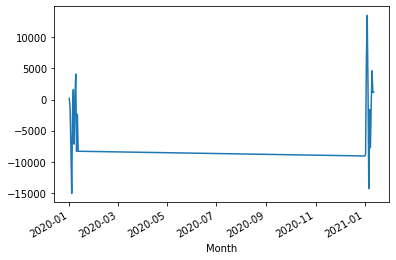

In [ ]:
#df['Seasonal First Difference'].plot()

**Auto Regressive Model**

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 129499 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 9.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=029c3ee5887f4135201f46b7c288adeaf25d06339f1373075b2e4a54060179ed
  Stored in directory: /root/.cache/pip/wheels/e2/96/fb/b17d6b9adb7c223428b4c77d9e8bc29f40a51d625389b73461
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 77.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127980 sha256=efa192398b78d8249851685e5c9f47bb411dd2ab3a897fd8994671de23efc256
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy


In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

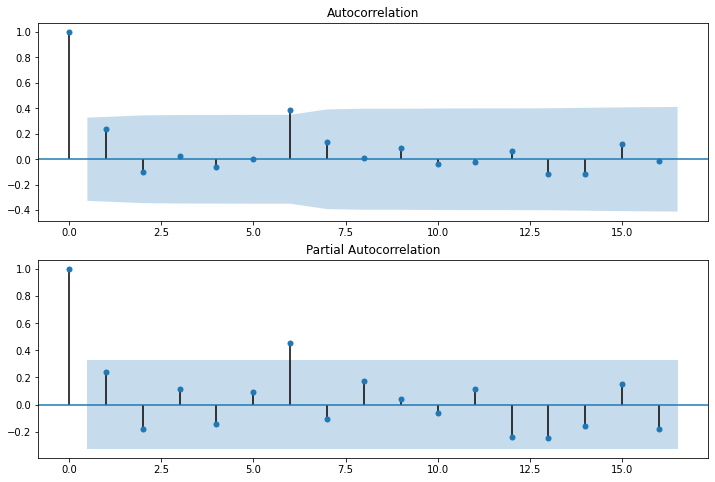

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Blood usage'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Blood usage'],ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
model=ARIMA(df['Blood usage'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Blood usage   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -345.291
Method:                       css-mle   S.D. of innovations           4443.097
Date:                Tue, 31 Jan 2023   AIC                            698.582
Time:                        08:30:12   BIC                            704.803
Sample:                             1   HQIC                           700.729
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -176.1743     81.471     -2.162      0.031    -335.854     -16.494
ar.L1.D.Blood usage     0.1360      0.170      0.799      0.424      -0.197       0.469
ma.L1.D.Blood usage    -1.0000      0.080    -12.451      0.000      -1.157      -0.843
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.3540           +0.0000j            7.3540            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

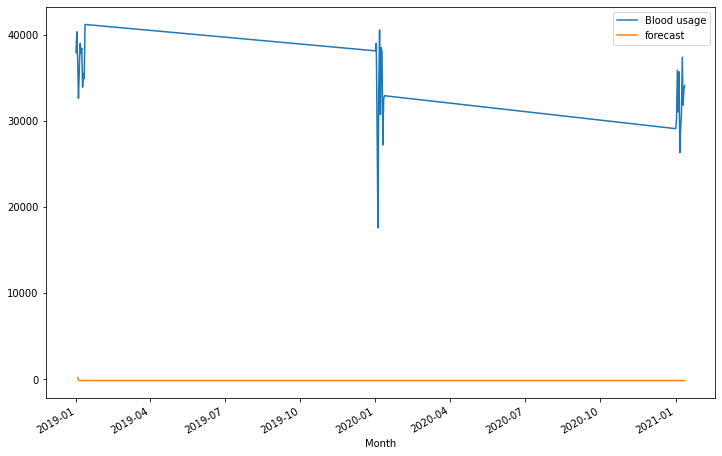

In [ ]:
df['forecast']=model_fit.predict(dynamic=True)
df[['Blood usage','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Blood usage'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

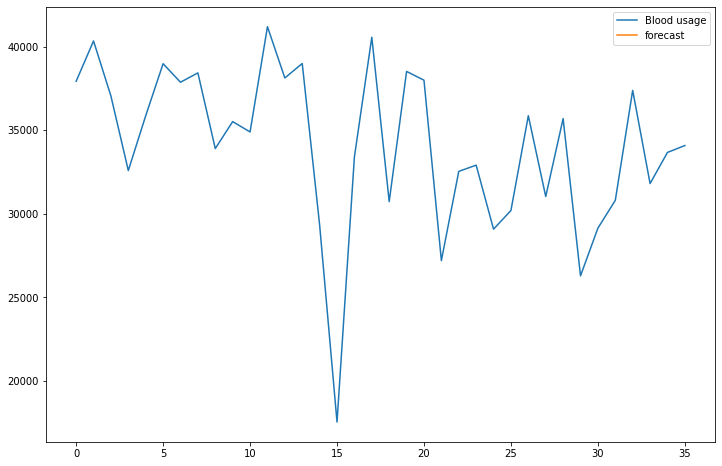

In [ ]:
df['forecast']=results.predict(start=1,end=36,dynamic=True)
df[['Blood usage','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail(12)

,Month,Blood usage,forecast
<DateOffset: months=12>,NaN,NaN,NaN
<DateOffset: months=13>,NaN,NaN,NaN
<DateOffset: months=14>,NaN,NaN,NaN
<DateOffset: months=15>,NaN,NaN,NaN
<DateOffset: months=16>,NaN,NaN,NaN
<DateOffset: months=17>,NaN,NaN,NaN
<DateOffset: months=18>,NaN,NaN,NaN
<DateOffset: months=19>,NaN,NaN,NaN
<DateOffset: months=20>,NaN,NaN,NaN
<DateOffset: months=21>,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


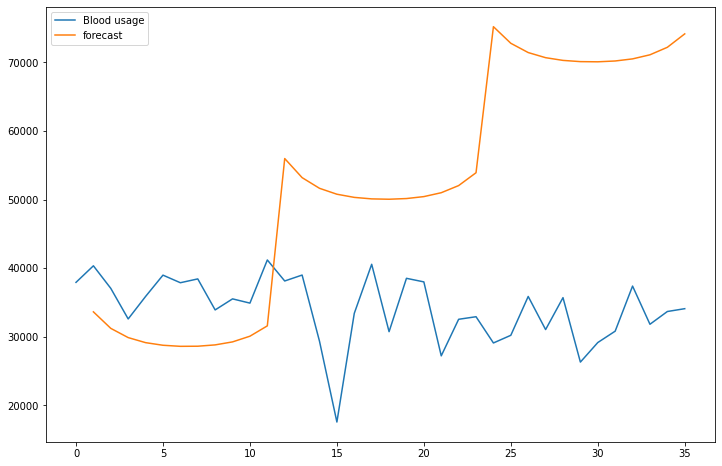

In [ ]:
future_df['forecast'] = results.predict(start = 1, end = 40, dynamic= True)  
future_df[['Blood usage', 'forecast']].plot(figsize=(12, 8)) 